
# IPAN - ImageJ Processing Assistant Notebook

## 00 - Working with ImageJ pt.2
**ImageJ - PlugIns and Image processing**

***
### Import Libraries and packages 

In [1]:
import scyjava                    # {optional} Set memory pool
from skimage import io            # ImageJ opener, open the image on the background ImageJ
from IPython.display import Image # Display only images
import os                         # Used to manipulate and create directory with python.
import tifffile                   # Save .tif files from numpy arrays

***

### Import ImageJ

By default, the ImageJ2 gateway will not include the legacy layer for backwards compatibility with the original ImageJ. The legacy layer is necessary for macros and any ImageJ-based plugins. 
In order to use original ImageJ macros, plugins, or other code you must initiate the environment with **legacy supported**. If in doubt, you can check the ij.legacy().isActive() function to see if your initialization worked properly. 
With the following initialization we can work with ImageJ1 plugins. In addition, we can import the desired list of plugins from a local repository.


In [2]:
## Change the memory pool if required
#scyjava.config.add_options('-Xmx2g') # <--- Example: set 2G memory.

import imagej
ij = imagej.init(['sc.fiji:fiji:2.0.0-pre-10', 'net.imagej:imagej-legacy'])
print("The actual version of ImageJ is:", ij.getApp().getInfo(True))

log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


14:41:01.015 [SciJava-725fc585-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:382)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:79)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:489)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:138)
	at sun.reflect.NativeConstructorAccesso

In [3]:
#ALTERNATIVES: 

## Upload local plugins
#plugins_dir = '/Applications/Fiji.app/plugins'
#scyjava.config.add_option(f'-Dplugins.dir={plugins_dir}')

## AND

## Initialize ImageJ with legacy for retrocompatibility with IMAGEJ1
#ij = imagej.init(['net.imagej:imagej', 'net.imagej:imagej-legacy'])

With the forollowing command we can ask if the legagy for retrocompatibility is active. To run this notebook is essential that the legacy is ACTIVE.

In [4]:
print("Legacy state: Is active?", ij.legacy.isActive())

Legacy state: Is active? True


Import jimport to use the WindowManager

In [5]:
from scyjava import jimport
WindowManager = jimport('ij.WindowManager')

***
### Run a PLUG IN to process the image

#### Filters

Open the image within a Macro and show it to screen

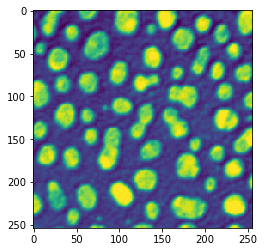

In [6]:
ij.py.run_macro("""run("Blobs (25K)");""")  # Open the sample blob image
blobs = ij.py.active_image_plus()           # Assign it to a JN varible
ij.py.show(blobs)

Run a plugin mean (IJ1 plugin) and display the result to screen

In [7]:
plugin = 'Mean'
args = {
    'block_radius_x': 10,
    'block_radius_y': 10            
}
ij.py.run_plugin(plugin, args)

<java object 'org.scijava.script.ScriptModule'>

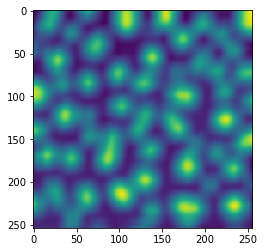

In [8]:
filtered_blobs = ij.py.active_image_plus()
ij.py.show(filtered_blobs)

Perform the image processing filter on a local image previously opened with the macro

In [9]:
#DEFINE INPUT AND OUTPUT
cwd = os.getcwd() #Get current directory
IMAGES_dir = cwd + "/IMAGES"
RESULTS_dir = cwd + "/RESULTS"

try:
    os.mkdir(RESULTS_dir)  
except FileExistsError:
    print("This directory already exist!")
    
print("The images are imported from: ", IMAGES_dir)
print("The results are exported in: ", RESULTS_dir)

This directory already exist!
The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS


In [10]:
# FOR ALL THE FOLLOWING MACRO 
# The arguments input/ouput directories will be the same.
# The arguments input/ouput filename will be defined before running the macro.

INPUT_filename = "input filename"  # <--- THIS VARIABLE MUST BE RE-SET  BEFORE CALLING THE MACRO 
OUTPUT_filename = "output filename"  # <--- THIS VARIABLE MUST BE RE-SET BEFORE CALLING THE MACRO 

args_IO = {
    'dir_in': f"{IMAGES_dir}",          
    'dir_out' : f"{RESULTS_dir}",
    'filename_in' : f"{INPUT_filename}",
    'filename_out' : f"{OUTPUT_filename}"   
}

In [11]:
#OPEN THE IMAGE and compute the IMAGE PROFILE
macro_OpenProfile = """
//DEFINE IO
#@ String dir_in
#@ String dir_out
#@ String filename_in
#@ String filename_out
#@output String path_in
#@output String path_out

path_in = dir_in + "/" + filename_in
path_out = dir_out + "/" + filename_out

//OPEN IMAGE
open(path_in)

//MAKE AND SAVE PROFILE ON ORIGINAL IMAGE
H = getHeight();
W = getWidth();
makeLine(0, 0, W, H);
run("Plot Profile");
saveAs(".png", path_out);

//SELECT IMAGE FOR NEXT STEP 
selectWindow(filename_in);
"""

In [12]:
args_IO['filename_in'] = "image_test2.tif"
args_IO['filename_out'] = "image_test2_profile.png"

result = ij.py.run_macro(macro_OpenProfile, args_IO)

INPUT_path = result.getOutput("path_in")
OUTPUT_path = result.getOutput("path_out")

print("\nINPUT file:", INPUT_path)
print("\nOUTPUT file:", OUTPUT_path)

[INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_profile.png]]

INPUT file: /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2.tif

OUTPUT file: /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_profile.png


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_profile.png]]


Show the original image and the profile computed on it. We can show the image just opened with the macroOpenProfile because of the last line of the macro *selectWindow(filename_in)* that select the the image of interest and allow to display it to screen by calling the *ij.py.active_image_plus()* command.


ORIGINAL IMAGE:


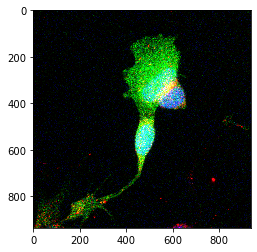


ORIGINAL IMAGE PROFILE:


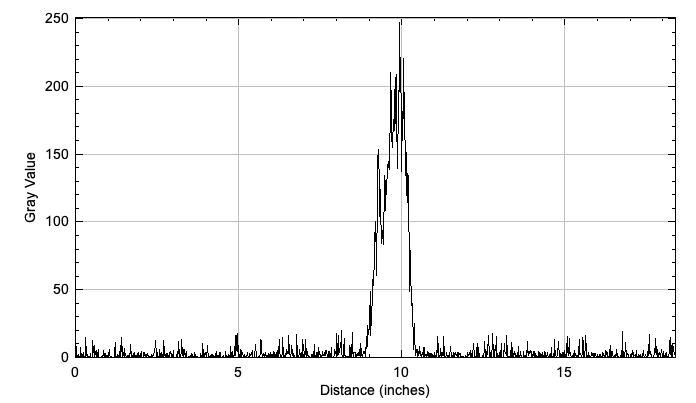

In [13]:
analysed_image = ij.py.active_image_plus()
print("\nORIGINAL IMAGE:")
ij.py.show(analysed_image)

print("\nORIGINAL IMAGE PROFILE:")
Image(f"{OUTPUT_path}")

By running the plugin we process the last active image on ImageJ. We can then compute the profile on the processed picture after save it and show it to screen.

In [14]:
plugin = 'Mean'
args_mean = { 
    'block_radius_x': 30,
    'block_radius_y': 30
}
ij.py.run_plugin(plugin, args_mean)

<java object 'org.scijava.script.ScriptModule'>

After running the plugin, the filtered image is active one. At this point, by running a macro we would modify this image. Also here we can see and display the image to screen by calling the *ij.py.active_image_plus()* command.

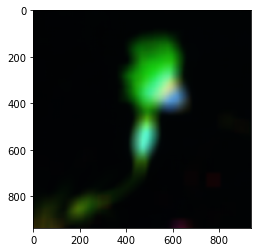

In [15]:
filtered = ij.py.active_image_plus()
ij.py.show(filtered)

**HOW TO SAVE:** To save this file from the notebook we need to convert the resulted image in a numpy array with *ij.py.from_java()* command and then write the file as .tif with the *tifffile.imwrite()* command. For this purpose we need to specify the destination path.

In [16]:
#Convert to numpy
numpy_filtered = ij.py.from_java(filtered)
print(type(numpy_filtered))

<class 'xarray.core.dataarray.DataArray'>


In [17]:
#Save with tifffile to IMAGES_dir so that we can use it for future processing
tosave_path_file = IMAGES_dir + "/image_test2_filtered.tif"
tifffile.imwrite(tosave_path_file, numpy_filtered, imagej=True) 

14:41:21.412 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - processor is INTEL_64 os.arch is x86_64
14:41:21.414 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
14:41:21.415 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
14:41:21.416 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is natives/osx_64/
14:41:21.417 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
14:41:21.419 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find resource natives/osx_64/libturbojpeg.dylib
14:41:21.420 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is osx_64/
14:41:21.420 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
14:41:21.422 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find r

[java.lang.Enum.toString] 14:41:21.412 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - processor is INTEL_64 os.arch is x86_64
[java.lang.Enum.toString] 14:41:21.414 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
[java.lang.Enum.toString] 14:41:21.415 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
[java.lang.Enum.toString] 14:41:21.416 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is natives/osx_64/
[java.lang.Enum.toString] 14:41:21.417 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
[java.lang.Enum.toString] 14:41:21.419 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find resource natives/osx_64/libturbojpeg.dylib
[java.lang.Enum.toString] 14:41:21.420 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is osx_64/
[java.lang.

14:41:21.737 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:254)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:371)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:341)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:316)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:82)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:64)
	at org.scijava.io.IOService.getOpener(IOService.java:55)
	at org.scijava.io.DefaultIOService.open(DefaultIOService.java:66)
Caused by: org.xml.sax.SAXParseException: Content is not all

[java.lang.Enum.toString] 14:41:21.737 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:254)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:371)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:341)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:316)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:82)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:64)
	at org.scijava.io.IOService.getOpener(IOService.java:55)
	at org.scijava.io.DefaultIOService.open(DefaultIOService.java:66)
Caused by: org.xml.sax.SAXParseExc

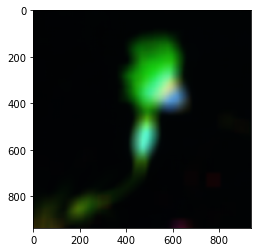

In [18]:
#Re-open the previous image as demonstration
saved_image = ij.io().open(tosave_path_file) 
ij.py.show(saved_image)

Now, to compute the profile on the filtered picture we can use the previous macro (macro_OpenProfile) and just change the Input/Output arguments. 
With this example I showed how we can re-use a macro by personalising setting the filename_in and filename_out.

In [19]:
args_IO['filename_in'] = "image_test2_filtered.tif"
args_IO['filename_out'] = "image_test2_filtered_profile.png"

result = ij.py.run_macro(macro_OpenProfile, args_IO)

INPUT_path = result.getOutput("path_in")
OUTPUT_path = result.getOutput("path_out")

print("\nINPUT file:", INPUT_path)
print("\nOUTPUT file:", OUTPUT_path)

[INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2_filtered.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_filtered_profile.png]]

INPUT file: /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2_filtered.tif

OUTPUT file: /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_filtered_profile.png


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2_filtered.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_filtered_profile.png]]



FILTERED IMAGE:


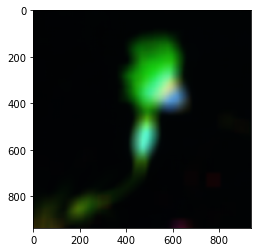


FILTERED IMAGE PROFILE:


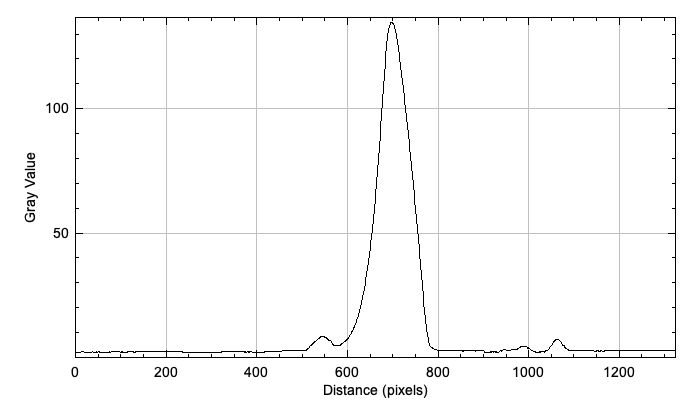

In [20]:
print("\nFILTERED IMAGE:")
ij.py.show(ij.io().open(f"{INPUT_path}"))

print("\nFILTERED IMAGE PROFILE:")
Image(f"{OUTPUT_path}")

***
***